# Project to import and visualise macro data

At this stage needs to be quick and dirty to get things ready for interview
Data sources:
* quandl
* FRED

quandl brings data in as dataframes, FRED as numpy series. I'm converting all to dataframes at the import stage so that I'm working with similar shaped data

In [1]:
import quandl as qd
import numpy as np
from datetime import datetime as dt
import pandas as pd
# this allows table to display notes from FRED calls
pd.options.display.max_colwidth = 130
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20,5)

from pandas_datareader import data   
qd.ApiConfig.api_key = "Pn4VQFgZqt6Uid7qWa_p"

from fredapi import Fred
# initialise the API key. Can pass key directly into Fred() or point to a file. I have saved
# api key into file below.
fred = Fred(api_key_file= '/home/alex/alex/projects/datascienceprojects/apis/fredapikey.txt')

In [2]:
# This command searches the FRED database. Pretty cool!
# fred.search("constant maturity")
fred.search("BofAML")

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,"Daily, Close",D,BAMLH0A0HYM2,2019-11-20 14:29:02,The ICE BofAML Option-Adjusted Spreads (OASs) are the calculated spreads between a computed OAS index of all bonds in a given ...,2019-11-19,1996-12-31,93,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US High Yield Master II Option-Adjusted Spread,Percent,%
BAMLC0A4CBBB,"Daily, Close",D,BAMLC0A4CBBB,2019-11-20 14:28:02,"This data represents the Option-Adjusted Spread (OAS) of the ICE BofAML US Corporate BBB Index, a subset of the ICE BofAML US ...",2019-11-19,1996-12-31,81,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US Corporate BBB Option-Adjusted Spread,Percent,%
BAMLH0A3HYC,"Daily, Close",D,BAMLH0A3HYC,2019-11-20 14:29:02,"This data represents the Option-Adjusted Spread (OAS) of the ICE BofAML US Corporate C Index, a subset of the ICE BofAML US Hi...",2019-11-19,1996-12-31,79,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US High Yield CCC or Below Option-Adjusted Spread,Percent,%
BAMLH0A0HYM2EY,"Daily, Close",D,BAMLH0A0HYM2EY,2019-11-20 14:26:02,"This data represents the effective yield of the ICE BofAML US High Yield Master II Index, which tracks the performance of US d...",2019-11-19,1996-12-31,78,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US High Yield Master II Effective Yield,Percent,%
BAMLC0A4CBBBEY,"Daily, Close",D,BAMLC0A4CBBBEY,2019-11-20 14:27:01,"This data represents the effective yield of the ICE BofAML US Corporate BBB Index, a subset of the ICE BofAML US Corporate Mas...",2019-11-19,1996-12-31,76,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US Corporate BBB Effective Yield,Percent,%
BAMLH0A1HYBB,"Daily, Close",D,BAMLH0A1HYBB,2019-11-20 14:26:02,"This data represents the Option-Adjusted Spread (OAS) of the ICE BofAML US Corporate BB Index, a subset of the ICE BofAML US H...",2019-11-19,1996-12-31,75,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US High Yield BB Option-Adjusted Spread,Percent,%
BAMLC0A0CM,"Daily, Close",D,BAMLC0A0CM,2019-11-20 14:29:02,The ICE BofAML Option-Adjusted Spreads (OASs) are the calculated spreads between a computed OAS index of all bonds in a given ...,2019-11-19,1996-12-31,75,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US Corporate Master Option-Adjusted Spread,Percent,%
BAMLH0A3HYCEY,"Daily, Close",D,BAMLH0A3HYCEY,2019-11-20 14:26:02,"This data represents the effective yield of the ICE BofAML US Corporate C Index, a subset of the ICE BofAML US High Yield Mast...",2019-11-19,1996-12-31,74,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US High Yield CCC or Below Effective Yield,Percent,%
BAMLHYH0A0HYM2TRIV,"Daily, Close",D,BAMLHYH0A0HYM2TRIV,2019-11-20 14:29:02,"This data represents the ICE BofAML US High Yield Master II Index value, which tracks the performance of US dollar denominated...",2019-11-19,1986-08-31,71,2019-11-21,2019-11-21,Not Seasonally Adjusted,NSA,ICE BofAML US High Yield Master II Total Return Index Value,Index,Index


In [3]:
# import data from external sources. Convert all data to dataframes so that I have consistent structure to work with

End = dt.today().strftime("%Y-%m-%d")
Start = ('1960-01-01')

SP500 = pd.DataFrame(fred.get_series('SP500'),columns=['SP500'])
#SP500 = qd.get('YALE/SPCOMP', column_index='4', start_date= Start, end_date=End)
BamlHY = pd.DataFrame(fred.get_series('BAMLH0A0HYM2'),columns=['BamlHY'])
Gold = pd.DataFrame(fred.get_series('GOLDPMGBD228NLBM'),columns=['Gold'])
Copper = qd.get('CHRIS/CME_HG2', column_index='4', start_date= Start, end_date=End)
Copper.columns = ['Copper']
#SP500.columns = ['SP500']

copper_monthly = pd.DataFrame(fred.get_series('PCOPPUSDM'),columns=['Copper'])

### "Outer Merge"

Using "Merge" function to join dataframes so that all dates are included. E.g. if one data from from 2010-01-01 to 
2018-01-01 and the other is from 2000-01-01 to 2019-01-01 the joined dataframe will be from 2000-01-01 to 2019-01-01.
Missing values are NaN.

Also uses dict function to join the individual dataframes into an dictionary object that can be iterated over to merge the individual dataframes.

In [4]:
variables = [SP500, BamlHY, Gold, Copper]
var_qty = list(range(len(variables)))
mydict = dict(zip(var_qty, variables))

prices = pd.DataFrame()
for i in var_qty:
    prices = pd.merge(prices,mydict[i],how='outer',left_index=True,right_index=True)


In [5]:
start = dt(1990, 1, 1)
prices = prices[start:]
prices.tail()

,SP500,BamlHY,Gold,Copper
2019-11-14,3096.63,4.08,1466.65,2.6230
2019-11-15,3120.46,4.06,1466.90,2.6365
2019-11-18,3122.03,4.09,1467.65,2.6190
2019-11-19,3120.18,4.12,1468.45,2.6555
2019-11-20,3108.46,NaN,1471.70,2.6475


## "Join"

Use join here to perform left had join - i.e. use monthly index in the copper time series

In [6]:
end = dt.today()

range_temp = pd.date_range(start = start, end = end, freq = 'D')
dftemp = pd.DataFrame(index = range_temp, columns = ['a'])
dftemp = dftemp.join(prices['Gold'])
dftemp = dftemp.join(prices['SP500'])
dftemp.fillna(method = 'ffill', inplace=True)

prices_m = copper_monthly
prices_m = prices_m.join(dftemp['Gold'])
prices_m = prices_m.join(dftemp['SP500'])

prices_m['Copper/Gold'] = prices_m['Copper']/prices_m['Gold']
prices_m_chg = prices_m.pct_change(periods = 6)


## Investigate whether changes in copper/gold have any impact on S&P or bond yields

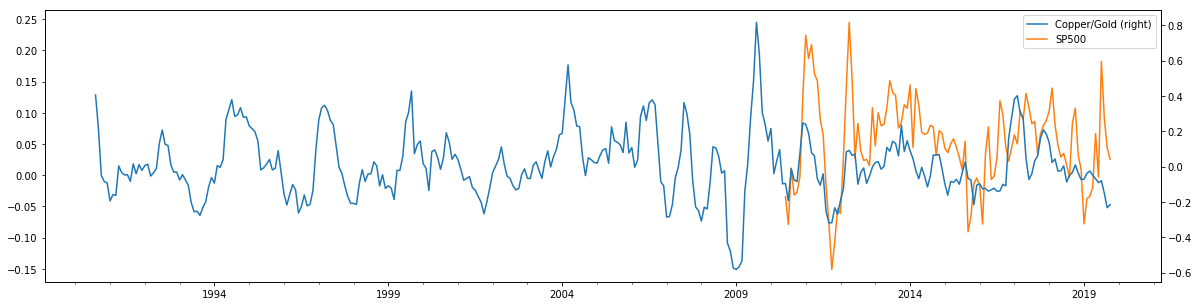

In [7]:
prices_m_chg['Copper/Gold'].plot(secondary_y=True, legend=True)
prices_m_chg['SP500'].plot(legend=True)

## Calculate volatility.

Currently vol is %ge vol so not applicable for basis point vol

In [8]:
# create new series of Copper/Gold

prices['Copper/Gold'] = prices['Copper']/prices['Gold']

# Create new dataframe which is percent change of all the prices (daily changes)

prices_chg = prices.pct_change()

vol = prices_chg.rolling(252*3).std(ddof=0)*(252**0.5)
# if .rolling(252*3) is omitted then it calcs std over the entire series
# vol.tail()

## Calc a df of moving averages

This is to visualise how a dataline is trending.

- simlpe MA generated by 'rolling'
- exponentially weighted MA generated by 'ewm'

I'm implementing the exponential weight using the "half life" paramater. Very roughly setting half life to [window length] / 2. Seems to be broadly equivalent.

In [10]:
SP500 = pd.DataFrame(prices['SP500'])
SP500_MA5 = SP500.rolling(window=5, min_periods=3).mean()
SP500_MA10 = SP500.rolling(window=10, min_periods=7).mean()
SP500_MA30 = SP500.rolling(window=30, min_periods=25).mean()
SP500_MA90 = SP500.rolling(window=90, min_periods=80).mean()
SP500_MA180 = SP500.rolling(window=180, min_periods=160).mean()

SP500['MA5'] = SP500_MA5
SP500['MA10'] = SP500_MA10
SP500['MA30'] = SP500_MA30
SP500['MA90'] = SP500_MA90
SP500['MA180'] = SP500_MA180

In [11]:
SP500e = pd.DataFrame(prices['SP500'])
SP500e_EXP5 = SP500e.ewm(halflife=2.5, min_periods=3).mean()
SP500e_EXP10 = SP500e.ewm(halflife=5, min_periods=7).mean()
SP500e_EXP30 = SP500e.ewm(halflife=15, min_periods=25).mean()
SP500e_EXP90 = SP500e.ewm(halflife=45, min_periods=80).mean()
SP500e_EXP180 = SP500e.ewm(halflife=90, min_periods=160).mean()

SP500e['EXP5'] = SP500e_EXP5
SP500e['EXP10'] = SP500e_EXP10
SP500e['EXP30'] = SP500e_EXP30
SP500e['EXP90'] = SP500e_EXP90
SP500e['EXP180'] = SP500e_EXP180

### Set Start and End dates to enable zooming in on chart. 

A bit clunky - I'll figure out how to do dynamic charts one of these days

In [12]:
SP500.tail() 

,SP500,MA5,MA10,MA30,MA90,MA180
2019-11-14,3096.63,3092.520,3084.436,3019.746667,2974.404205,2929.938497
2019-11-15,3120.46,3097.996,3089.791,3025.361667,2975.610568,2931.727746
2019-11-18,3122.03,3105.000,3094.167,3031.469667,2976.951364,2933.540173
2019-11-19,3120.18,3110.668,3098.723,3039.040333,2978.494091,2935.260983
2019-11-20,3108.46,3113.552,3101.891,3045.342333,2979.782159,2936.853584


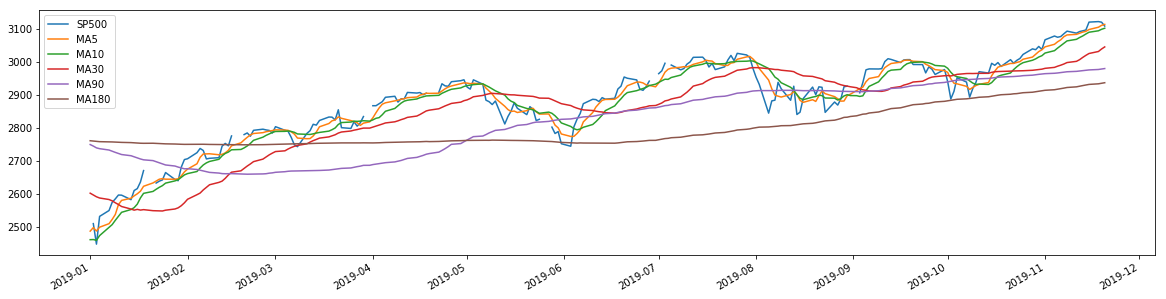

In [13]:
st = Start
st = dt(2019,1,1)

end = dt.today()
#end = dt(2019,10,1)

SP500[st:end].plot()


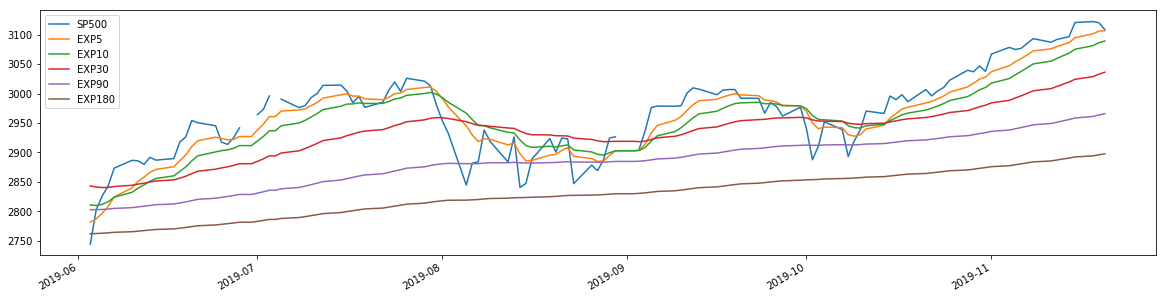

In [18]:
st = Start
st = dt(2019,6,1)

end = dt.today()
#end = dt(2019,10,1)

SP500e[st:end].plot()
# print(SP500e.tail())

Text(0.5,1,'Volatility')

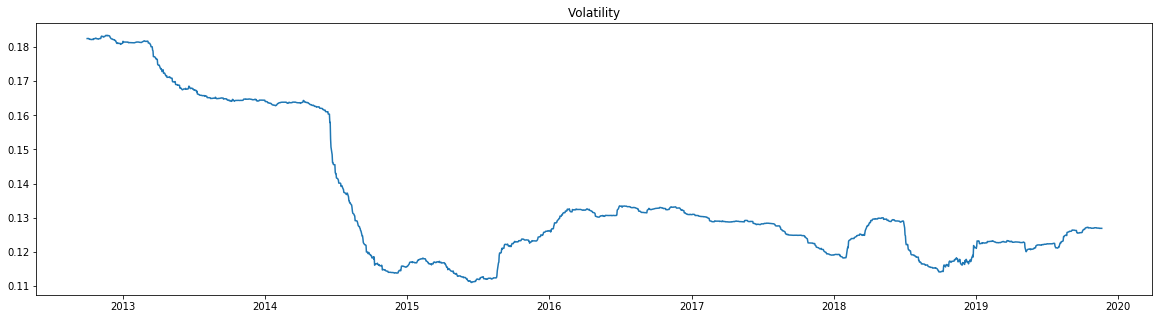

In [19]:
fig = plt.figure()

plt.plot(vol.index, vol['SP500'])

plt.title('Volatility')

In [20]:
start = dt(2014, 1, 1)
prices_trunc = prices[start:]

Text(0.5,1,'Copper Gold ratio')

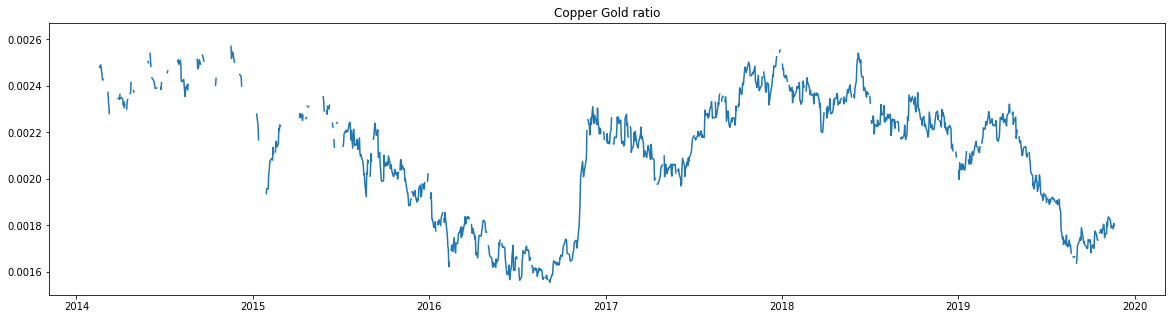

In [21]:
fig = plt.figure()

plt.plot(prices_trunc.index, prices_trunc['Copper/Gold'])

plt.title('Copper Gold ratio')

Text(0.5,1,'Gold')

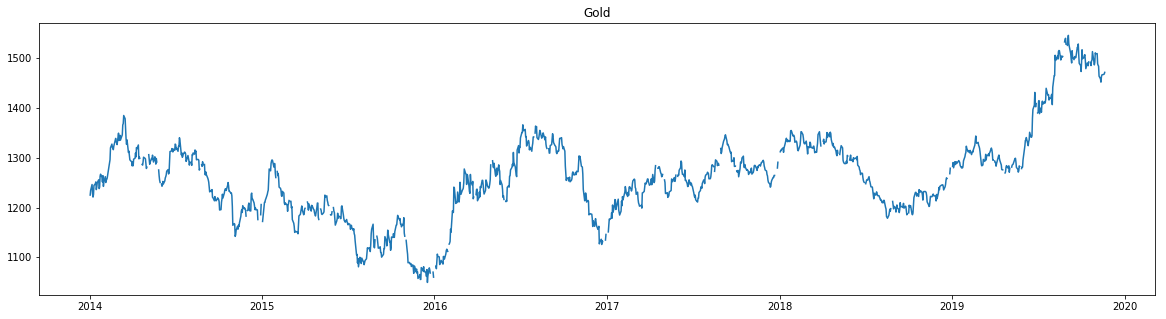

In [22]:
fig = plt.figure()

plt.plot(prices_trunc.index, prices_trunc['Gold'])

plt.title('Gold')

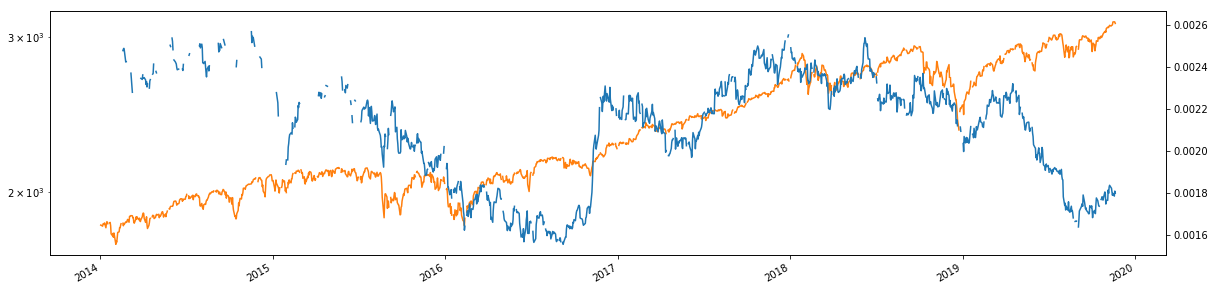

In [23]:
prices_trunc['Copper/Gold'].plot(secondary_y = True)
prices_trunc['SP500'].plot(logy=True)

In [24]:
new

NameError: name 'new' is not defined

In [25]:
df = [SP500, BamlHY, Gold, Copper]
df_qty = list(range(len(df)))
mydict = dict(zip(df_qty, df))
latest_start_date = dt(1900, 1, 1)
for i in df_qty:
    temp = mydict[i].index[0]
    latest_start_date = max(temp, latest_start_date)
print('latest start date = ', str(latest_start_date))

for i in df_qty:
    mydict[i] = mydict[i].loc[latest_start_date:]

df = pd.DataFrame(mydict)
df


latest start date =  1996-12-31 00:00:00


ValueError: If using all scalar values, you must pass an index